# Graph-tool tutorial

The following tutorial demonstrates working with graphs using the [graph-tool python module](https://graph-tool.skewed.de/). In the process, you will learn how to:

* create a simple graphs,
* perform basic network analysis,
* visualize graphs and their properties.

For additional background on the parameters for the drawing routines, see the [graph-tool tutorial](https://stevenbergner.github.io/Teaching/cmpt767/graph-tutorial)

In [29]:
import pandas as pd
import numpy as np
import graph_tool.all as gt
%matplotlib inline
print("graph-tool version: {}".format(gt.__version__.split(' ')[0]))

graph-tool version: 2.46


# Show datasets in collection

In [2]:
with pd.option_context('display.max_colwidth', -1):
    display(pd.DataFrame.from_records(gt.collection.descriptions,
                                      index=['description']).transpose())

,description
adjnoun,"Word adjacencies: adjacency network of common adjectives and nouns in the novel David Copperfield by Charles Dickens. Please cite M. E. J. Newman, Phys. Rev. E 74, 036104 (2006). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
as-22july06,"Internet: a symmetrized snapshot of the structure of the Internet at the level of autonomous systems, reconstructed from BGP tables posted by the `University of Oregon Route Views Project <http://routeviews.org/>`_. This snapshot was created by Mark Newman from data for July 22, 2006 and is not previously published. Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
astro-ph,"Astrophysics collaborations: weighted network of coauthorships between scientists posting preprints on the Astrophysics E-Print Archive between Jan 1, 1995 and December 31, 1999. Please cite M. E. J. Newman, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
celegansneural,"Neural network: A directed, weighted network representing the neural network of C. Elegans. Data compiled by D. Watts and S. Strogatz and made available on the web `here <http://cdg.columbia.edu/cdg/datasets>`_. Please cite D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998). Original experimental data taken from J. G. White, E. Southgate, J. N. Thompson, and S. Brenner, Phil. Trans. R. Soc. London 314, 1-340 (1986). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
cond-mat,"Condensed matter collaborations 1999: weighted network of coauthorships between scientists posting preprints on the Condensed Matter E-Print Archive between Jan 1, 1995 and December 31, 1999. Please cite M. E. J. Newman, The structure of scientific collaboration networks, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
cond-mat-2003,"Condensed matter collaborations 2003: updated network of coauthorships between scientists posting preprints on the Condensed Matter E-Print Archive. This version includes all preprints posted between Jan 1, 1995 and June 30, 2003. The largest component of this network, which contains 27519 scientists, has been used by several authors as a test-bed for community-finding algorithms for large networks; see for example J. Duch and A. Arenas, Phys. Rev. E 72, 027104 (2005). These data can be cited as M. E. J. Newman, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
cond-mat-2005,"Condensed matter collaborations 2005: updated network of coauthorships between scientists posting preprints on the Condensed Matter E-Print Archive. This version includes all preprints posted between Jan 1, 1995 and March 31, 2005. Please cite M. E. J. Newman, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
dolphins,"Dolphin social network: an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand. Please cite D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, Behavioral Ecology and Sociobiology 54, 396-405 (2003). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_."
email-Enron,"Enron email communication network covers all the email communication within a dataset of around half million emails. This data was originally made public, and posted to the web, by the Federal Energy Regulatory Commission during its investigation. Nodes of the network are email addresses and if an address i sent at least one email to address j, the graph contains an undirected edge from i to j. Note that non-Enron email addresses act as sinks and sources in the network as we only obs

In [3]:
g = gt.collection.data['karate']
g

<Graph object, undirected, with 34 vertices and 78 edges, 1 internal vertex property, 2 internal graph properties, at 0x17dc32320>

In [4]:
list(g.vp.keys())

['pos']

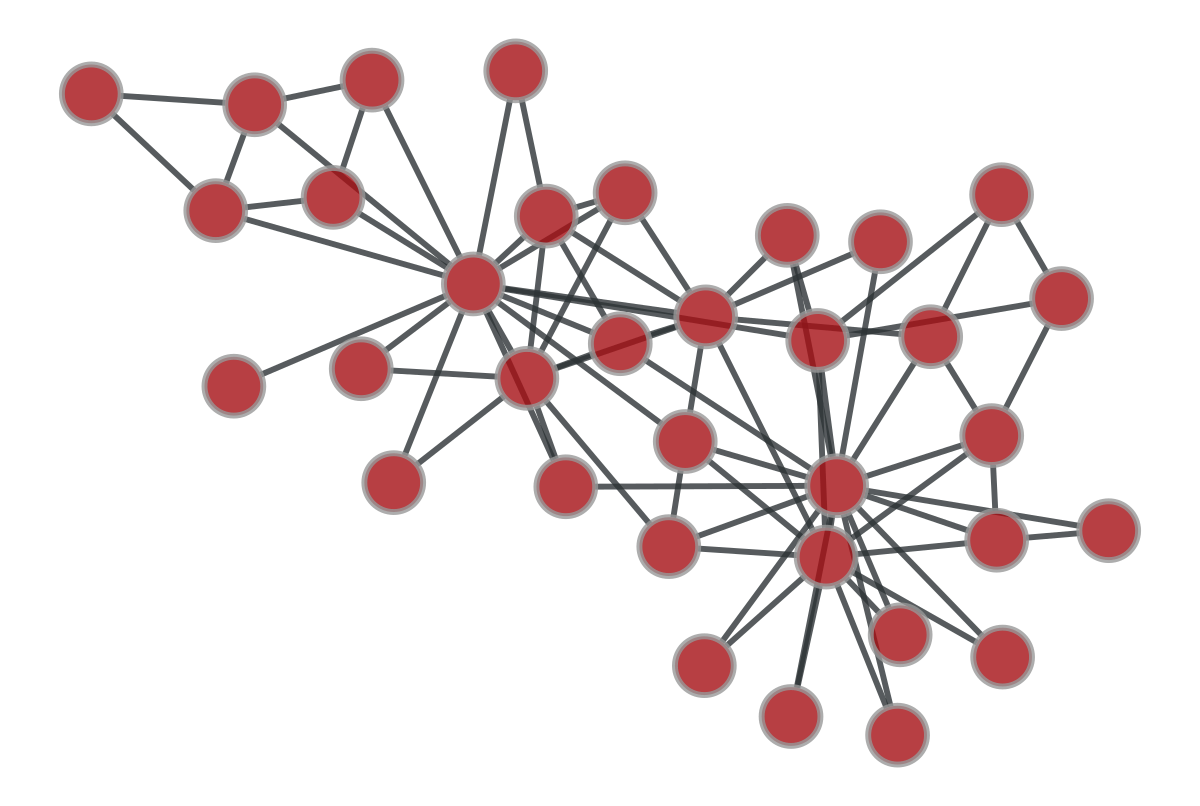

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17dc32320, at 0x17dc33ac0>

In [6]:
gt.graph_draw(g, pos=g.vp['pos'])

In [7]:
X_knows = {
    'Mary': ['Peter', 'Albert', 'DavidF', 'Peter'],
    'Judy': ['Bob', 'Alan'],
    'Peter': ['Mary', 'DavidF', 'Jon'],
    'DavidF': ['Albert', 'Joseph', 'Peter', 'Mary'],
    'Jon': ['Peter', 'Joseph', 'DavidE'],
    'DavidE': ['Jon', 'Joseph', 'Albert'],
    'Joseph': ['DavidE', 'Jon', 'DavidF'],
    'Bob': ['Judy', 'Alan'],
    'Alan': ['Bob', 'Mary', 'Judy'],
    'Albert': ['DavidF', 'Mary', 'DavidE'],
}

In [13]:
g = gt.Graph(directed=False)

In [14]:
v_name = g.add_edge_list(((n,k) for n in X_knows for k in X_knows[n]),
                         hashed=True)
g.vp['name'] = v_name

In [15]:
pos = gt.arf_layout(g)
#pos = gt.planar_layout(g)
#pos = gt.fruchterman_reingold_layout(ug)

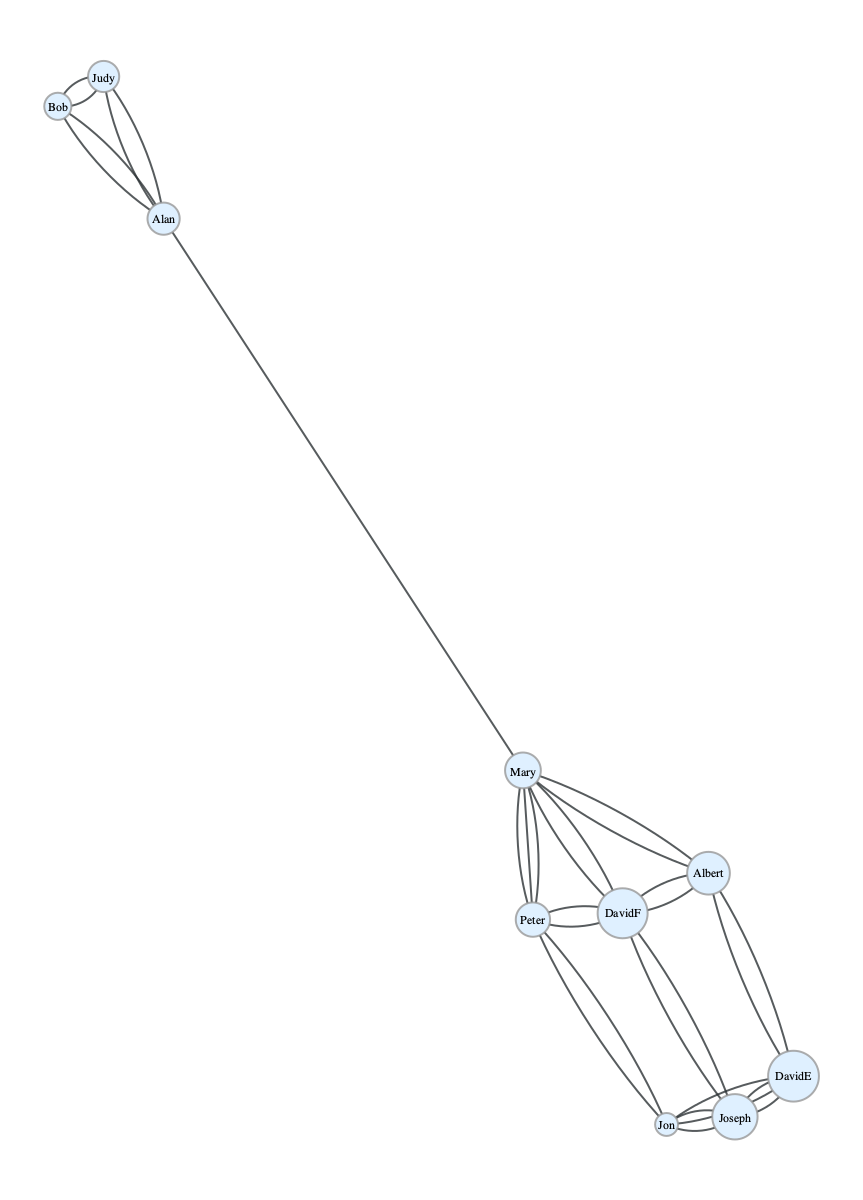

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17dc33fd0, at 0x17dfb8640>

In [16]:
gt.graph_draw(
    g,
    pos=pos,
    vertex_fill_color="#dff0ff",
    vertex_text=v_name,
    vertex_size=10,
)

In [19]:
#from functools import *
#X_names = reduce(lambda a,b: set(a).union(b), X_knows.values()).union(X_knows.keys())

In [18]:
gt.graphviz_draw(
    g,
    output="output.svg",
    output_format="svg"
)

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17dc33fd0, at 0x17df959c0>

In [20]:
from IPython.display import HTML
display(HTML(f"<img src='output.svg'/>"))

![](output.svg)

# Create a graph using Python iterations

Below is a slow and tedious version of what can be done with a single call to `add_edge_list(...)` on a `Graph`.

In [21]:
# Create edge tuples and list of unique names
X_edges = list((n,k) for n in X_knows for k in X_knows[n])
from functools import reduce
X_names = reduce(lambda a,b: set(a).union(b),
                 (X_knows[n] for n in X_knows)
                ).union(X_knows.keys())
X_names = list(X_names)

In [22]:
# Construct a 'StringIndexer' to convert strings to integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
lem = le.fit(list(X_names))
X_edges = list(map(lem.transform, X_edges))

In [23]:
# Create Graph object and add a string property for names
g2 = gt.Graph()
v_name = g2.new_vertex_property('string')
g2.vertex_properties['name'] = v_name

In [24]:
for vn in lem.classes_:
    v = g2.add_vertex()
    v_name[v] = vn

In [25]:
for f,t in X_edges:
    g2.add_edge(f,t)

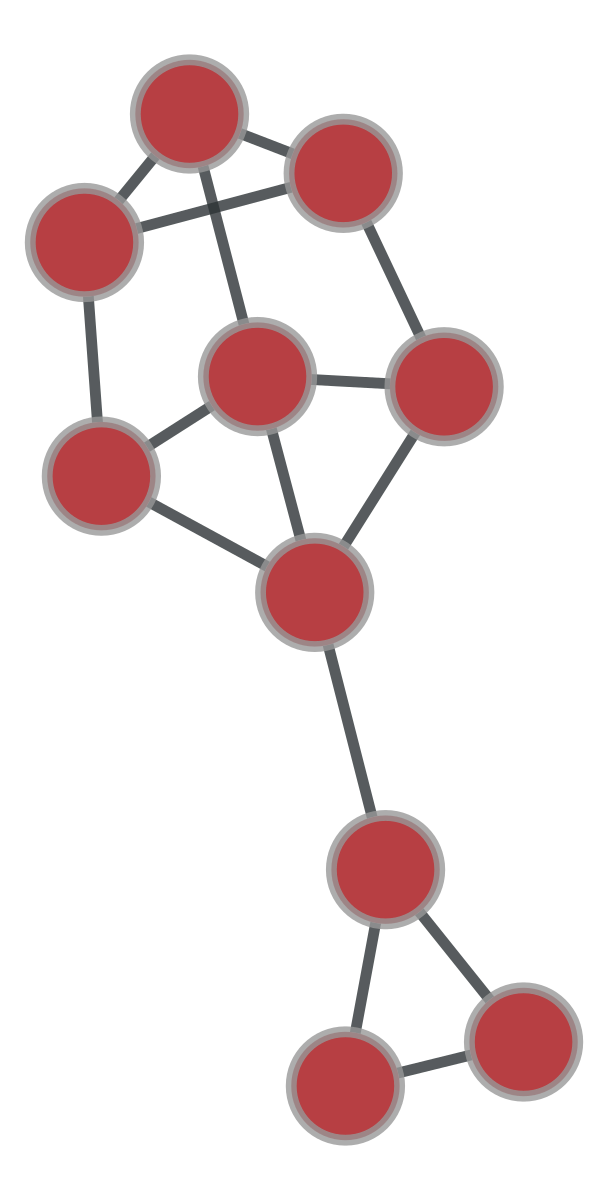

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17dd819c0, at 0x17fd72e60>

In [26]:
g3 = gt.GraphView(g2, directed=False)
gt.remove_parallel_edges(g3)
gt.graph_draw(g3)

# Another graph example
From graph-tools [search module](https://graph-tool.skewed.de/static/doc/search_module.html)

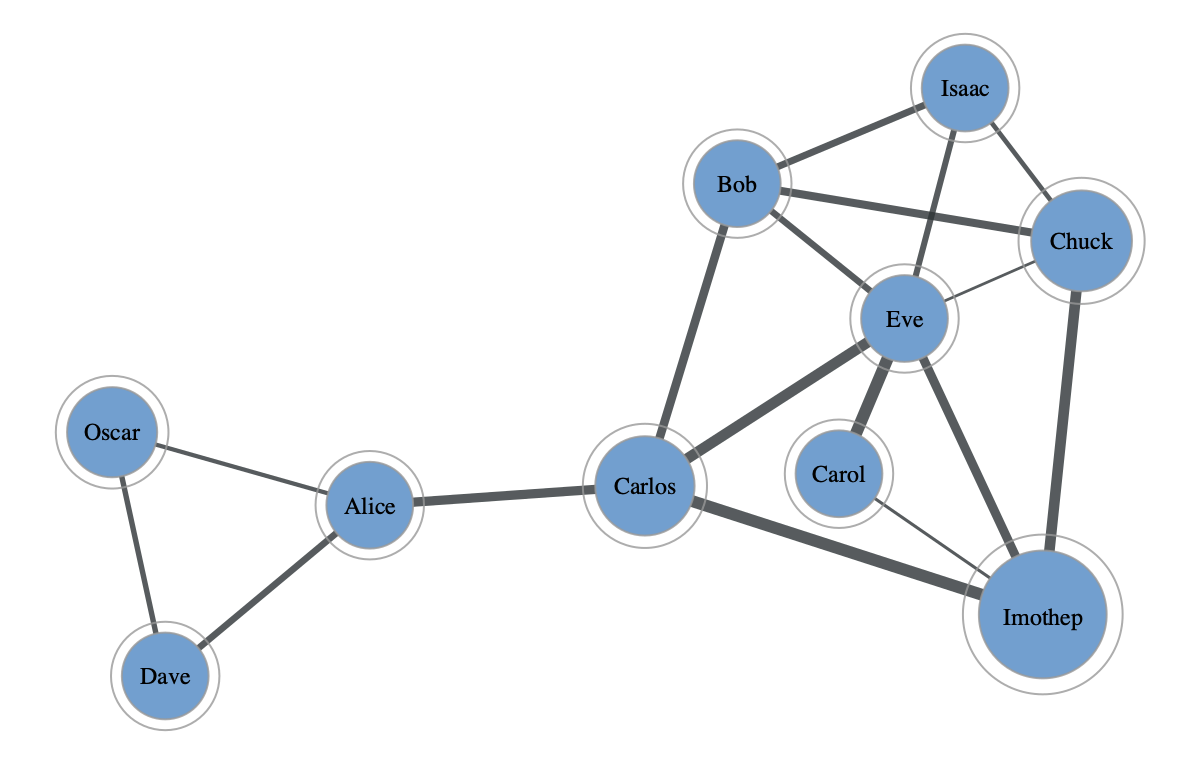

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17fd738b0, at 0x17df7b730>

In [28]:
# download the xml source, if missing
#!wget https://stevenbergner.github.io/Teaching/cmpt767/search_example.xml

g = gt.load_graph("search_example.xml")
name = g.vp["name"]
weight = g.ep["weight"]
pos = g.vp["pos"]
gt.graph_draw(g, pos, vertex_text=name, vertex_font_size=12, vertex_shape="double_circle",
              vertex_fill_color="#729fcf", vertex_pen_width=1,
              edge_pen_width=weight)
